In [15]:
import pandas as pd
import matplotlib.pyplot as plt

## Steps of a semi-join
In the last video, you were shown how to perform a semi-join with `pandas`. In this exercise, you'll solidify your understanding of the necessary steps. Recall that a semi-join filters the left table to only the rows where a match exists in both the left and right tables.

Instructions

- Sort the steps in the correct order of the technique shown to perform a semi-join in `pandas`.

Step 1:
Merge the left and right tables on key column using an inner-join.

Step 2:
Search if the key column in the left table is in the merged tables using the `.isin()` method creating a Boolean `Series`.

Step 3:
Subset the rows of the left table.

## Performing an anti-join
In our music streaming company dataset, each customer is assigned an employee representative to assist them. In this exercise, filter the employee table by a table of top customers, returning only those employees who are **not** assigned to a customer. The results should resemble the results of an anti-join. The company's leadership will assign these employees additional training so that they can work with high valued customers.

The `top_cust` and `employees` tables have been provided for you.

Instructions

- Merge `employees` and `top_cust` with a left join, setting `indicator` argument to `True`. Save the result to `empl_cust`.
- Select the `srid` column of `empl_cust` and the rows where `_merge` is `'left_only'`. Save the result to `srid_list`.
- Subset the `employees` table and select those rows where the `srid` is in the variable `srid_list` and print the results.

In [2]:
# Import the DataFrames
employees = pd.read_csv('employees.csv')
top_cust = pd.read_csv('top_cust.csv')

In [3]:
# Merge employees and top_cust
empl_cust = employees.merge(top_cust, on='srid', 
                            how='left', indicator=True)

In [4]:
# Select the srid column where _merge is left_only
srid_list = empl_cust.loc[empl_cust['_merge'] == 'left_only', 'srid']

In [5]:
# Get employees not working with top customers
employees[employees['srid'].isin(srid_list)]

,srid,lname,fname,title,hire_date,email
0,1,Adams,Andrew,General Manager,2002-08-14,andrew@chinookcorp.com
1,2,Edwards,Nancy,Sales Manager,2002-05-01,nancy@chinookcorp.com
5,6,Mitchell,Michael,IT Manager,2003-10-17,michael@chinookcorp.com
6,7,King,Robert,IT Staff,2004-01-02,robert@chinookcorp.com
7,8,Callahan,Laura,IT Staff,2004-03-04,laura@chinookcorp.com


## Performing a semi-join
Some of the tracks that have generated the most significant amount of revenue are from TV-shows or are other non-musical audio. You have been given a table of invoices that include top revenue-generating items. Additionally, you have a table of non-musical tracks from the streaming service. In this exercise, you'll use a semi-join to find the top revenue-generating non-musical tracks..

The tables `non_mus_tcks`, `top_invoices`, and `genres` have been loaded for you.

Instructions

- Merge `non_mus_tcks` and `top_invoices` on `tid` using an inner join. Save the result as `tracks_invoices`.
- Use `.isin()` to subset the rows of `non_mus_tck` where `tid` is in the `tid` column of `tracks_invoices`. Save the result as `top_tracks`.
- Group `top_tracks` by `gid` and count the `tid` rows. Save the result to `cnt_by_gid`.
- Merge `cnt_by_gid` with the `genres` table on `gid` and print the result.

In [6]:
# Import the DataFrames
non_mus_tcks = pd.read_csv('non_mus_tcks.csv')
top_invoices = pd.read_csv('top_invoices.csv')
genres = pd.read_csv('genres.csv')

In [7]:
# Merge the non_mus_tck and top_invoices tables on tid
tracks_invoices = non_mus_tcks.merge(top_invoices, on='tid')

# Use .isin() to subset non_mus_tcsk to rows with tid in tracks_invoices
top_tracks = non_mus_tcks[non_mus_tcks['tid'].isin(tracks_invoices['tid'])]

# Group the top_tracks by gid and count the tid rows
cnt_by_gid = top_tracks.groupby(['gid'], as_index=False).agg({'tid':'count'})

# Merge the genres table to cnt_by_gid on gid and print
print(cnt_by_gid.merge(genres, on='gid'))

   gid  tid      name
0   19    4  TV Shows
1   21    2     Drama
2   22    1    Comedy


## Concatenation basics
You have been given a few tables of data with musical track info for different albums from the metal band, Metallica. The track info comes from their Ride The Lightning, Master Of Puppets, and St. Anger albums. Try various features of the `.concat()` method by concatenating the tables vertically together in different ways.

The tables `tracks_master`, `tracks_ride`, and `tracks_st` have loaded for you.

Instructions

- Concatenate `tracks_master`, `tracks_ride`, and `tracks_st`, in that order, setting `sort` to `True`.
- Concatenate `tracks_master`, `tracks_ride`, and `tracks_st`, where the index goes from 0 to n-1.
- Concatenate `tracks_master`, `tracks_ride`, and `tracks_st`, showing only columns that are in all tables.

In [8]:
# Import the DataFrames
tracks_master = pd.read_csv('tracks_master.csv')
tracks_ride = pd.read_csv('tracks_ride.csv')
tracks_st = pd.read_csv('tracks_st.csv')

In [11]:
# Concatenate the tracks
tracks_from_albums = pd.concat([tracks_master, tracks_ride, tracks_st],
                               sort=True)
tracks_from_albums

,Unnamed: 0,aid,composer,gid,mtid,name,tid,u_price
0,0,152,J.Hetfield/L.Ulrich,3,1,Battery,1853,0.99
1,1,152,K.Hammett,3,1,Master Of Puppets,1854,0.99
2,4,152,J.Hetfield/L.Ulrich,3,1,Disposable Heroes,1857,0.99
0,0,154,NaN,3,1,Fight Fire With Fire,1874,0.99
1,1,154,NaN,3,1,Ride The Lightning,1875,0.99
2,2,154,NaN,3,1,For Whom The Bell Tolls,1876,0.99
3,3,154,NaN,3,1,Fade To Black,1877,0.99
4,4,154,NaN,3,1,Trapped Under Ice,1878,0.99
0,0,155,NaN,3,1,Frantic,1882,0.99
1,1,155,NaN,3,1,St. Anger,1883,0.99


In [13]:
# Concatenate the tracks so the index goes from 0 to n-1
tracks_from_albums = pd.concat([tracks_master, tracks_ride, tracks_st],
                               ignore_index=True,
                               sort=True)
tracks_from_albums

,Unnamed: 0,aid,composer,gid,mtid,name,tid,u_price
0,0,152,J.Hetfield/L.Ulrich,3,1,Battery,1853,0.99
1,1,152,K.Hammett,3,1,Master Of Puppets,1854,0.99
2,4,152,J.Hetfield/L.Ulrich,3,1,Disposable Heroes,1857,0.99
3,0,154,NaN,3,1,Fight Fire With Fire,1874,0.99
4,1,154,NaN,3,1,Ride The Lightning,1875,0.99
5,2,154,NaN,3,1,For Whom The Bell Tolls,1876,0.99
6,3,154,NaN,3,1,Fade To Black,1877,0.99
7,4,154,NaN,3,1,Trapped Under Ice,1878,0.99
8,0,155,NaN,3,1,Frantic,1882,0.99
9,1,155,NaN,3,1,St. Anger,1883,0.99


In [14]:
# Concatenate the tracks, show only columns names that are in all tables
tracks_from_albums = pd.concat([tracks_master, tracks_ride, tracks_st],
                               join='inner',
                               sort=True)
tracks_from_albums

,Unnamed: 0,aid,gid,mtid,name,tid,u_price
0,0,152,3,1,Battery,1853,0.99
1,1,152,3,1,Master Of Puppets,1854,0.99
2,4,152,3,1,Disposable Heroes,1857,0.99
0,0,154,3,1,Fight Fire With Fire,1874,0.99
1,1,154,3,1,Ride The Lightning,1875,0.99
2,2,154,3,1,For Whom The Bell Tolls,1876,0.99
3,3,154,3,1,Fade To Black,1877,0.99
4,4,154,3,1,Trapped Under Ice,1878,0.99
0,0,155,3,1,Frantic,1882,0.99
1,1,155,3,1,St. Anger,1883,0.99


## Concatenating with keys
The leadership of the music streaming company has come to you and asked you for assistance in analyzing sales for a recent business quarter. They would like to know which month in the quarter saw the highest average invoice total. You have been given three tables with invoice data named `inv_jul`, `inv_aug`, and `inv_sep`. Concatenate these tables into one to create a graph of the average monthly invoice total.

Instructions

- Concatenate the three tables together vertically in order with the oldest month first, adding `'7Jul'`, `'8Aug'`, and `'9Sep'` as `keys` for their respective months, and save to variable `avg_inv_by_month`.
- Use the `.agg()` method to find the average of the `total` column from the grouped invoices.
- Create a bar chart of `avg_inv_by_month`.

In [16]:
# Import the DataFrames
inv_jul = pd.read_csv('inv_jul.csv')
inv_aug = pd.read_csv('inv_aug.csv')
inv_sep = pd.read_csv('inv_sep.csv')

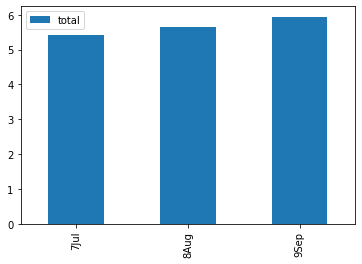

In [17]:
# Concatenate the tables and add keys
inv_jul_thr_sep = pd.concat([inv_jul, inv_aug, inv_sep], 
                            keys=['7Jul','8Aug','9Sep'])

# Group the invoices by the index keys and find avg of the total column
avg_inv_by_month = inv_jul_thr_sep.groupby(level=0).agg({'total':'mean'})

# Bar plot of avg_inv_by_month
avg_inv_by_month.plot(kind='bar')
plt.show()

## Using the append method
The `.concat()` method is excellent when you need a lot of control over how concatenation is performed. However, if you do not need as much control, then the `.append()` method is another option. You'll try this method out by appending the track lists together from different Metallica albums. From there, you will merge it with the `invoice_items` table to determine which track sold the most.

The tables `tracks_master`, `tracks_ride`, `tracks_st`, and `invoice_items` have loaded for you.

Instructions

- Use the `.append()` method to combine (**in this order**) `tracks_ride`, `tracks_master`, and `tracks_st` together vertically, and save to `metallica_tracks`.
- Merge `metallica_tracks` and `invoice_items` on `tid` with an inner join, and save to `tracks_invoices`.
- For each `tid` and `name` in `tracks_invoices`, sum the quantity sold column, and save as `tracks_sold`.
- Sort `tracks_sold` in descending order by the `quantity` column, and print the table.

In [ ]:
# Import the DataFrames
invoice_items = pd.read_csv('invoice_items.csv')

In [ ]:
# Use the .append() method to combine the tracks tables
metallica_tracks = tracks_ride.append([tracks_master, tracks_st], sort=False)

# Merge metallica_tracks and invoice_items
tracks_invoices = metallica_tracks.merge(invoice_items, on='tid')

# For each tid and name sum the quantity sold
tracks_sold = tracks_invoices.groupby(['tid','name']).agg({'quantity':'sum'})

# Sort in decending order by quantity and print the results
tracks_sold.sort_values(['quantity'], ascending=False)

## Validating a merge
You have been given 2 tables, `artists`, and `albums`. Use the console to merge them using `artists.merge(albums, on='artid').head()`. Adjust the `validate` argument to answer which statement is **False**.

You can use `'many_to_one'` without an error, since there is a duplicate key in the left table.

## Concatenate and merge to find common songs
The senior leadership of the streaming service is requesting your help again. You are given the historical files for a popular playlist in the classical music genre in 2018 and 2019. Additionally, you are given a similar set of files for the most popular pop music genre playlist on the streaming service in 2018 and 2019. Your goal is to concatenate the respective files to make a large classical playlist table and overall popular music table. Then filter the classical music table using a semi-join to return only the most popular classical music tracks.

The tables `classic_18`, `classic_19`, and `pop_18`, `pop_19` have been loaded for you.

Instructions

- Concatenate the `classic_18` and `classic_19` tables vertically where the index goes from 0 to n-1, and save to `classic_18_19`.
- Concatenate the `pop_18` and `pop_19` tables vertically where the index goes from 0 to n-1, and save to `pop_18_19`.

In [18]:
# Import the DataFrames
classic_18 = pd.read_csv('classic_18.csv')
classic_19 = pd.read_csv('classic_19.csv')
pop_18 = pd.read_csv('pop_18.csv')
pop_19 = pd.read_csv('pop_19.csv')

In [19]:
# Concatenate the classic tables vertically
classic_18_19 = pd.concat([classic_18, classic_19], ignore_index=True)

# Concatenate the pop tables vertically
pop_18_19 = pd.concat([pop_18, pop_19], ignore_index=True)

In [20]:
# Merge classic_18_19 with pop_18_19
classic_pop = classic_18_19.merge(pop_18_19, on='tid')

# Using .isin(), filter classic_18_19 rows where tid is in classic_pop
popular_classic = classic_18_19[classic_18_19['tid'].isin(classic_pop['tid'])]

# Print popular chart
popular_classic

,Unnamed: 0,pid,tid
10,8557,12,3439
21,8563,12,3445
48,8555,12,3437
50,8553,12,3435
